# MULTIPLE LINEAR REGRESSION

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns,warnings as w
w.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


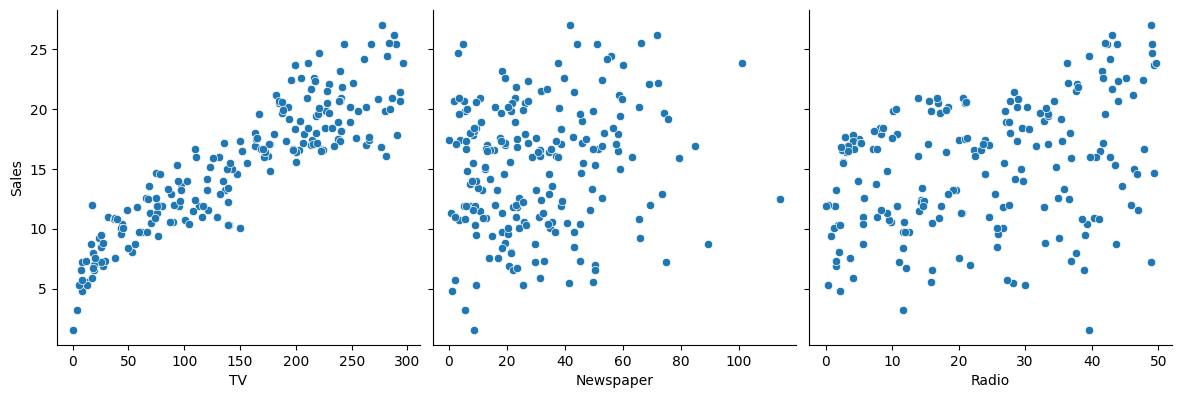

In [9]:
sns.pairplot(df, x_vars=['TV','Newspaper','Radio'], y_vars = 'Sales', size = 4, kind = 'scatter')

<Axes: >

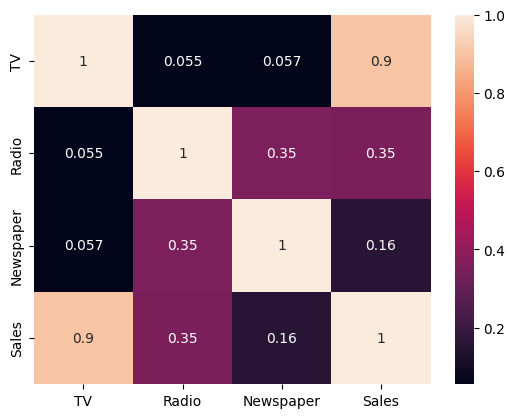

In [10]:
sns.heatmap(df.corr(), annot = True)

In [11]:
X = df['TV']
Y = df['Sales']

In [12]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

In [13]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1),Y_train)
Y_pred = lr.predict(X_test.values.reshape(-1,1))

In [14]:
Y_pred

array([18.71655207, 18.24810143, 12.22032694, 22.63347669, 21.14346502,
       22.82537213, 16.03565986, 17.02335699, 10.80368705, 18.97617531,
       16.10338766, 10.72467128, 18.93666743, 13.01612863, 19.56314961,
       13.91352202, 14.25216104, 23.22609497,  8.26389443, 18.71090808,
       12.48559417, 10.64565551,  8.23567451, 12.88067302, 13.19109212,
       17.45229974,  9.25159156, 20.86126584, 16.23319928, 20.37023926,
       20.3589513 , 20.05417618, 15.26807809, 16.42509472, 20.8386899 ,
       17.25476031, 19.37125417, 14.12234941, 19.05519108,  7.92525542])

In [15]:
lr.intercept_

6.819034628470241

In [16]:
lr.coef_

array([0.05643984])

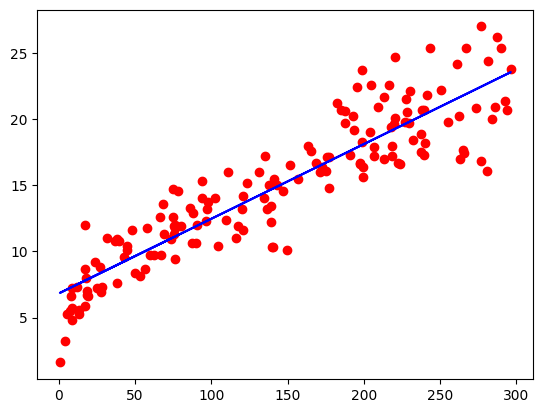

In [17]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,lr.predict(X_train.values.reshape(-1,1)),color='Blue')
plt.show()

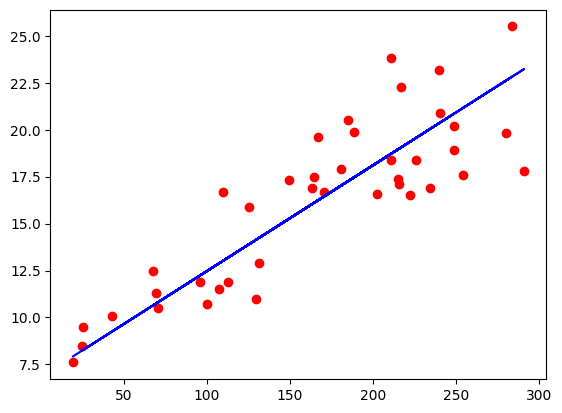

In [18]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,lr.predict(X_test.values.reshape(-1,1)),color='Blue')
plt.show()

In [19]:
print(lr.score(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1)))

0.8236989366715561


In [20]:
print(lr.score(X_test.values.reshape(-1,1),Y_test.values.reshape(-1,1)))

0.7241962282650848


In [21]:
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred) * 100
print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy (R2-Score) : {r2} %")

MAE : 1.9042820838267638
MSE : 5.304256414232315
RMSE : 2.3030971352143
Accuracy (R2-Score) : 72.41962282650847 %


In [24]:
def prediction():
    newobs = float(input("Enter how much you spend on TV advertising : "))
    yp = lr.predict([[newobs]])[0]
    print(f"The Sales according to {newobs} million dollars spent on TV advertising are {yp} billion dollars")
prediction()

Enter how much you spend on TV advertising :  296.4


The Sales according to 296.4 million dollars spent on TV advertising are 23.547802034492488 billion dollars
